In [55]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [56]:

customers = pd.read_csv("../Customers.csv")
products = pd.read_csv("../Products.csv")
transactions = pd.read_csv("../Transactions.csv")

In [57]:

customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [108]:

merged_data = pd.merge(transactions, customers, on="CustomerID")
merged_data = pd.merge(merged_data, products, on="ProductID")

In [109]:
merged_data.rename(columns={'Price_x': 'ProductPrice', 'Price_y': 'TransactionPrice'}, inplace=True)

In [110]:

print("\nUnique Customers:", customers['CustomerID'].nunique())
print("Unique Products:", products['ProductID'].nunique())
print("Unique Transactions:", transactions['TransactionID'].nunique())


Unique Customers: 200
Unique Products: 100
Unique Transactions: 1000


In [111]:

top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products by Quantity Sold:\n", top_products)


Top 5 Products by Quantity Sold:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


In [183]:

category_region_product_sales = merged_data.groupby(['Category', 'Region', 'ProductName']).agg(
    TotalSales=('Quantity', 'sum'),
    AveragePrice=('ProductPrice', 'mean')
).reset_index()

sorted_category_region_product_sales = category_region_product_sales.sort_values(by=['Region', 'TotalSales'], ascending=[True, False])


print("\nAll Products Sorted by Region and Sales:\n")
print(sorted_category_region_product_sales)



All Products Sorted by Region and Sales:

        Category         Region                  ProductName  TotalSales  \
68      Clothing           Asia            HomeSense T-Shirt          28   
59      Clothing           Asia            ActiveWear Jacket          23   
129  Electronics           Asia         SoundWave Headphones          21   
195   Home Decor           Asia          HomeSense Desk Lamp          21   
119  Electronics           Asia        ActiveWear Smartwatch          19   
..           ...            ...                          ...         ...   
181  Electronics  South America             SoundWave Laptop           3   
240   Home Decor  South America           BookWorld Wall Art           3   
241   Home Decor  South America   ComfortLiving Cookware Set           3   
170  Electronics  South America  BookWorld Bluetooth Speaker           2   
173  Electronics  South America     ComfortLiving Headphones           1   

     AveragePrice  
68     147.285556  
59  

In [112]:
# Revenue by Region
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue by Region:\n", region_revenue)


Revenue by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [65]:
# Revenue by Category_Region
category_region_revenue = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()
print("\nRevenue by Category and Region:\n", category_region_revenue)



Revenue by Category and Region:
 Category          Books  Clothing  Electronics  Home Decor
Region                                                    
Asia           33119.03  49353.09     35658.15    33944.70
Europe         47464.42  36335.59     41562.60    40892.02
North America  41811.99  38038.49     44716.43    27746.49
South America  69752.03  42443.49     58846.32    48310.72


In [66]:
# Popular Prodcts by_Region
popular_products_region = merged_data.groupby(['Region', 'ProductName'])['Quantity'].sum().reset_index()
popular_products_region = popular_products_region.sort_values(['Region', 'Quantity'], ascending=[True, False])
print("\nTop Products by Region:\n", popular_products_region.groupby('Region').head(3))


Top Products by Region:
             Region            ProductName  Quantity
39            Asia      HomeSense T-Shirt        28
4             Asia      ActiveWear Jacket        23
33            Asia    HomeSense Desk Lamp        21
67          Europe         ActiveWear Rug        30
106         Europe   SoundWave Headphones        27
104         Europe     SoundWave Cookbook        24
170  North America   SoundWave Headphones        37
136  North America    BookWorld Biography        25
132  North America  ActiveWear Smartwatch        24
196  South America  ActiveWear Smartwatch        38
198  South America    ActiveWear Textbook        38
222  South America    HomeSense Desk Lamp        29


In [184]:
# Least Selling Products by Region
least_selling_products_region = merged_data.groupby(['Region', 'ProductName'])['Quantity'].sum().reset_index()
least_selling_products_region = least_selling_products_region.sort_values(['Region', 'Quantity'], ascending=[True, True])
print("\nLeast Selling Products by Region:\n", least_selling_products_region.groupby('Region').head(3))



Least Selling Products by Region:
             Region                      ProductName  Quantity
23            Asia  ComfortLiving Bluetooth Speaker         1
0             Asia             ActiveWear Biography         2
14            Asia               BookWorld Cookbook         2
79          Europe                    BookWorld Rug         1
103         Europe      SoundWave Bluetooth Speaker         1
71          Europe               ActiveWear T-Shirt         3
128  North America                 ActiveWear Jeans         1
150  North America         ComfortLiving Headphones         1
145  North America               BookWorld Wall Art         2
213  South America         ComfortLiving Headphones         1
201  South America      BookWorld Bluetooth Speaker         2
187  South America             ActiveWear Biography         3


In [115]:

customer_revenue = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)


top_customers = merged_data[merged_data['CustomerID'].isin(customer_revenue.index)][['CustomerID', 'Region']].drop_duplicates()


top_customers['TotalRevenue'] = top_customers['CustomerID'].map(customer_revenue)


top_customers_sorted = top_customers.sort_values(by='TotalRevenue', ascending=False)

print("\nTop 10 Customers by Revenue Contribution and Region:\n")
print(top_customers_sorted[['CustomerID', 'Region', 'TotalRevenue']].to_string(index=False))



Top 10 Customers by Revenue Contribution and Region:

CustomerID        Region  TotalRevenue
     C0141        Europe      10673.87
     C0054          Asia       8040.39
     C0065 North America       7663.70
     C0156 North America       7634.45
     C0082 South America       7572.91
     C0188 South America       7111.32
     C0059 North America       7073.28
     C0028          Asia       6819.57
     C0099 South America       6715.72
     C0165 South America       6708.10


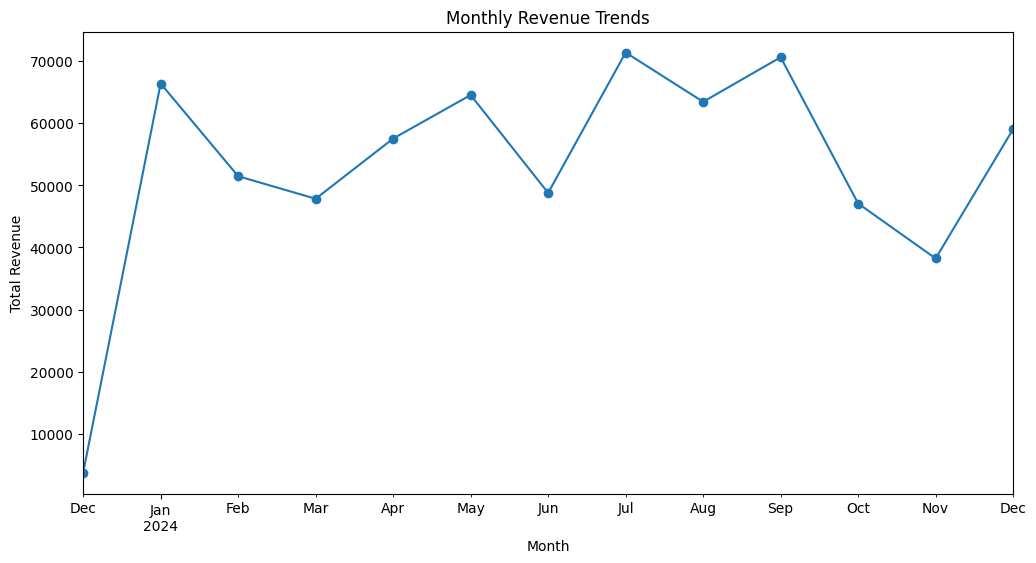

In [106]:

monthly_revenue = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_revenue.plot(kind='line', figsize=(12, 6), marker='o', title="Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

In [104]:


region_category_revenue = merged_data.groupby(['Region', 'Category']).agg(
    TotalRevenue=('TotalValue', 'sum'),
    TotalQuantity=('Quantity', 'sum')
).reset_index()

for region in region_category_revenue['Region'].unique():
    print(f"Region: {region}")
    

    region_data = region_category_revenue[region_category_revenue['Region'] == region]
    

    total_revenue_all_categories = 0
    total_quantity_all_categories = 0

   
    for _, row in region_data.iterrows():
        category = row['Category']
        total_revenue = row['TotalRevenue']
        total_quantity = row['TotalQuantity']
        
        print(f"  {category}: Revenue = ${total_revenue:.2f}, Quantity = {total_quantity}")
        
        total_revenue_all_categories += total_revenue
        total_quantity_all_categories += total_quantity

    print(f"  Total Revenue for {region}: ${total_revenue_all_categories:.2f}")
    print(f"  Total Quantity for {region}: {total_quantity_all_categories}\n")


Region: Asia
  Books: Revenue = $33119.03, Quantity = 120
  Clothing: Revenue = $49353.09, Quantity = 166
  Electronics: Revenue = $35658.15, Quantity = 132
  Home Decor: Revenue = $33944.70, Quantity = 142
  Total Revenue for Asia: $152074.97
  Total Quantity for Asia: 560

Region: Europe
  Books: Revenue = $47464.42, Quantity = 165
  Clothing: Revenue = $36335.59, Quantity = 119
  Electronics: Revenue = $41562.60, Quantity = 144
  Home Decor: Revenue = $40892.02, Quantity = 167
  Total Revenue for Europe: $166254.63
  Total Quantity for Europe: 595

Region: North America
  Books: Revenue = $41811.99, Quantity = 155
  Clothing: Revenue = $38038.49, Quantity = 147
  Electronics: Revenue = $44716.43, Quantity = 153
  Home Decor: Revenue = $27746.49, Quantity = 138
  Total Revenue for North America: $152313.40
  Total Quantity for North America: 593

Region: South America
  Books: Revenue = $69752.03, Quantity = 241
  Clothing: Revenue = $42443.49, Quantity = 158
  Electronics: Revenue =

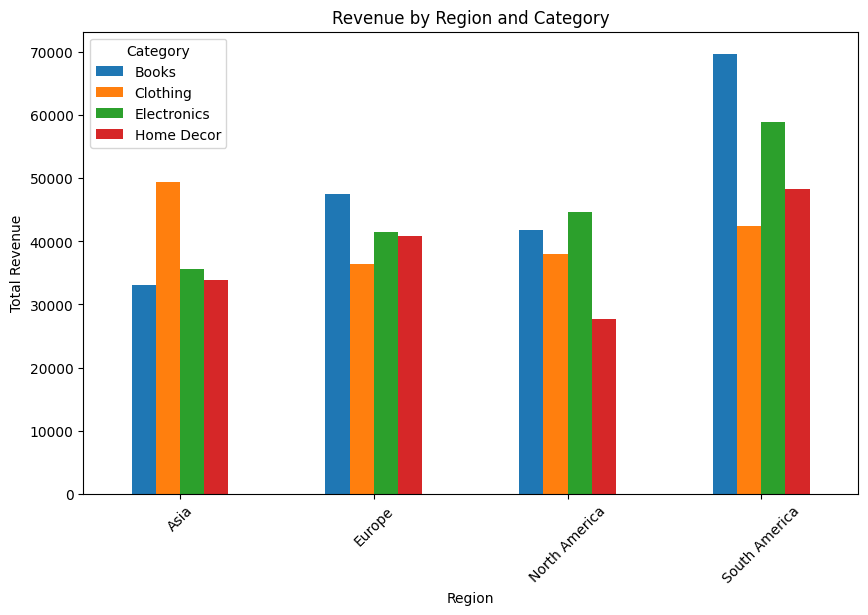

In [117]:
# Region_Category,
region_category_revenue = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack()


region_category_revenue.plot(kind='bar', figsize=(10, 6), stacked=False, title="Revenue by Region and Category")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.legend(title="Category")
plt.show()


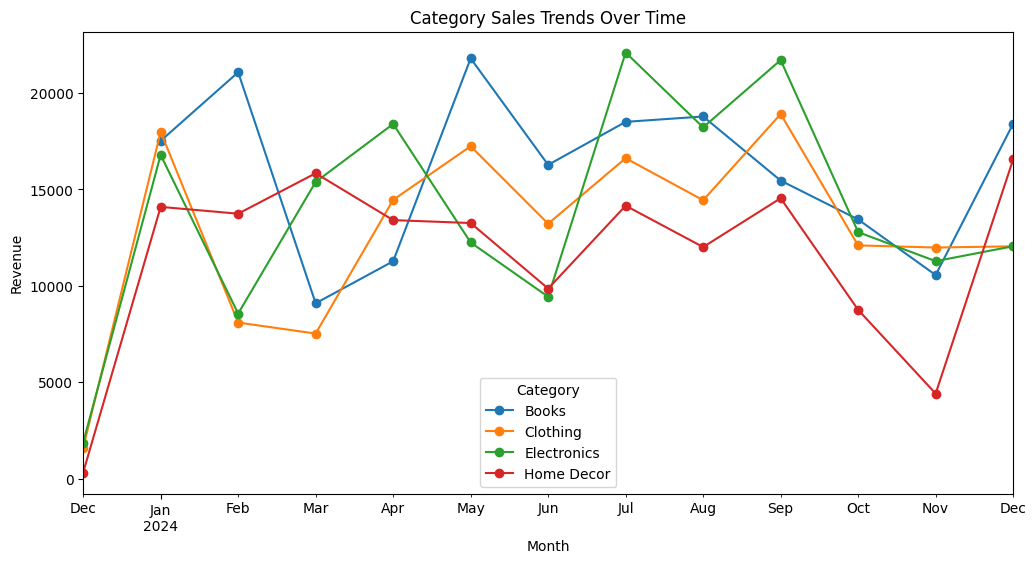

In [75]:
# Category Sales Trends Over Time
category_trends = merged_data.groupby([merged_data['TransactionDate'].dt.to_period('M'), 'Category'])['TotalValue'].sum().unstack()
category_trends.plot(kind='line', figsize=(12, 6), marker='o', title="Category Sales Trends Over Time")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.legend(title="Category")
plt.show()



In [123]:

retention_rate = merged_data.groupby('CustomerID')['TransactionDate'].nunique().reset_index()
retention_rate.columns = ['CustomerID', 'PurchaseFrequency']
average_retention_rate = retention_rate['PurchaseFrequency'].mean()
print("\nAverage Customer Retention Rate (Frequency):", average_retention_rate)


Average Customer Retention Rate (Frequency): 5.025125628140704


In [80]:

region_retention_rate = merged_data.groupby(['Region', 'CustomerID'])['TransactionDate'].nunique().reset_index()

region_retention_rate.columns = ['Region', 'CustomerID', 'PurchaseFrequency']

region_average_retention_rate = region_retention_rate.groupby('Region')['PurchaseFrequency'].mean()


print("\nAverage Customer Retention Rate by Region:")
print(region_average_retention_rate)




Average Customer Retention Rate by Region:
Region
Asia             4.954545
Europe           4.680000
North America    5.304348
South America    5.152542
Name: PurchaseFrequency, dtype: float64


In [81]:

product_repeatability = merged_data.groupby('ProductName')['CustomerID'].nunique() / merged_data['CustomerID'].nunique()
product_repeatability = product_repeatability.sort_values(ascending=False).head(5)
print("\nTop 5 Most Repeatedly Bought Products:\n", product_repeatability)


Top 5 Most Repeatedly Bought Products:
 ProductName
SoundWave Headphones     0.185930
ActiveWear Smartwatch    0.185930
BookWorld Biography      0.145729
SoundWave Cookbook       0.130653
ActiveWear Rug           0.125628
Name: CustomerID, dtype: float64


In [82]:

product_region_popularity = merged_data.groupby(['Region', 'ProductName', 'Category'])['Quantity'].sum().reset_index()


product_region_popularity = product_region_popularity.sort_values(['Region', 'Quantity'], ascending=[True, False]).groupby('Region').head(3)


print("\nTop Products in Each Region with Category:\n", product_region_popularity)



Top Products in Each Region with Category:
             Region            ProductName     Category  Quantity
39            Asia      HomeSense T-Shirt     Clothing        28
4             Asia      ActiveWear Jacket     Clothing        23
33            Asia    HomeSense Desk Lamp   Home Decor        21
67          Europe         ActiveWear Rug   Home Decor        30
106         Europe   SoundWave Headphones  Electronics        27
104         Europe     SoundWave Cookbook        Books        24
170  North America   SoundWave Headphones  Electronics        37
136  North America    BookWorld Biography        Books        25
132  North America  ActiveWear Smartwatch  Electronics        24
196  South America  ActiveWear Smartwatch  Electronics        38
198  South America    ActiveWear Textbook        Books        38
222  South America    HomeSense Desk Lamp   Home Decor        29


In [83]:

category_sales_by_region = merged_data.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()

category_sales_by_region = category_sales_by_region.sort_values(['Region', 'Quantity'], ascending=[True, False])


top_2_categories_per_region = category_sales_by_region.groupby('Region').head(2)

print("\nTop 2 Categories in Each Region:\n", top_2_categories_per_region)



Top 2 Categories in Each Region:
            Region     Category  Quantity
1            Asia     Clothing       166
3            Asia   Home Decor       142
7          Europe   Home Decor       167
4          Europe        Books       165
8   North America        Books       155
10  North America  Electronics       153
12  South America        Books       241
14  South America  Electronics       198


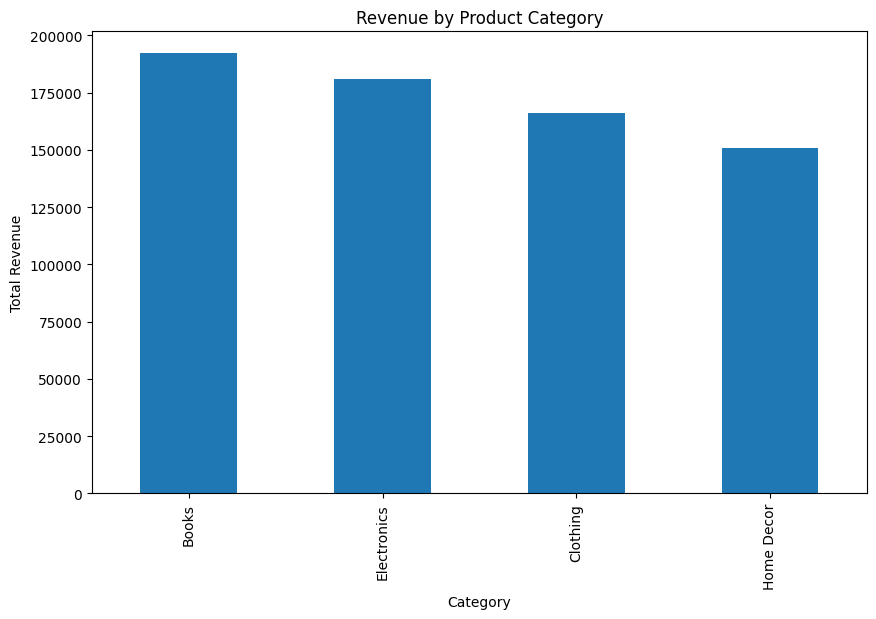

In [84]:
# Revenue by Product Category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', figsize=(10, 6), title="Revenue by Product Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.show()



Revenue by Product Category in Each Region:
            Region     Category  TotalValue
1            Asia     Clothing    49353.09
2            Asia  Electronics    35658.15
3            Asia   Home Decor    33944.70
0            Asia        Books    33119.03
4          Europe        Books    47464.42
6          Europe  Electronics    41562.60
7          Europe   Home Decor    40892.02
5          Europe     Clothing    36335.59
10  North America  Electronics    44716.43
8   North America        Books    41811.99
9   North America     Clothing    38038.49
11  North America   Home Decor    27746.49
12  South America        Books    69752.03
14  South America  Electronics    58846.32
15  South America   Home Decor    48310.72
13  South America     Clothing    42443.49


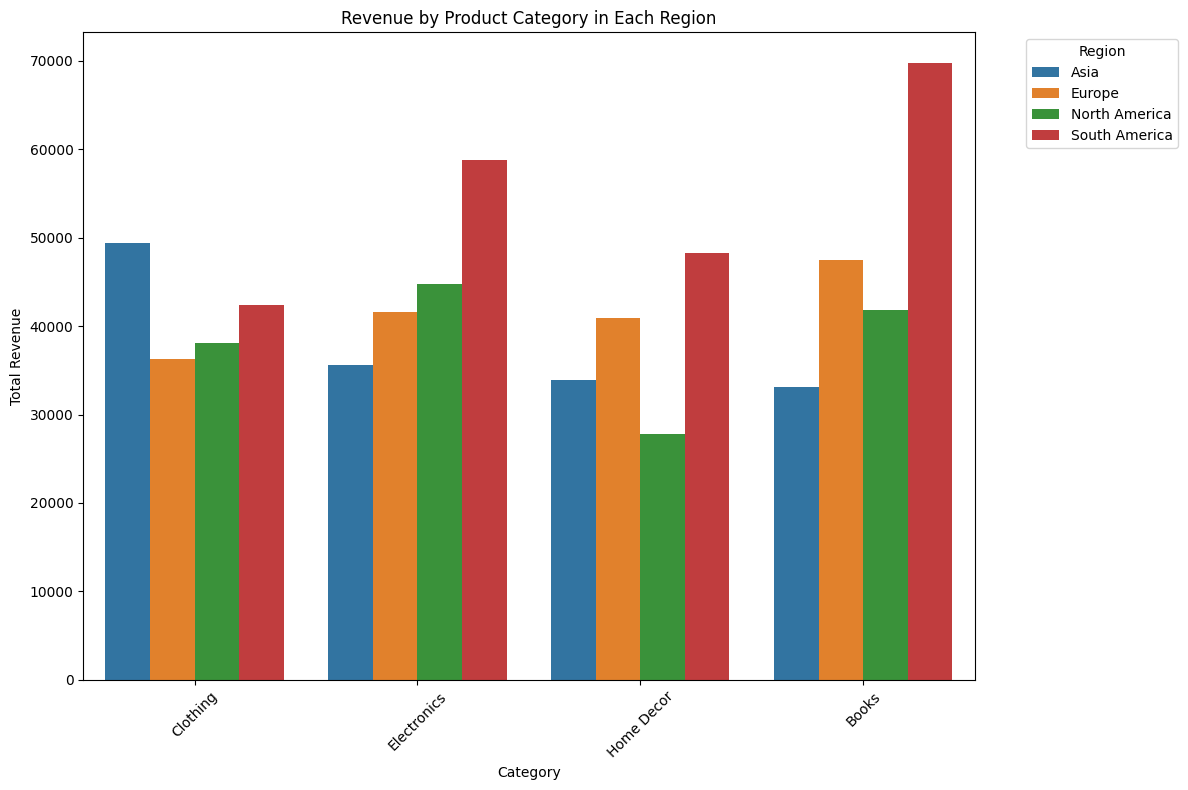

In [86]:

category_revenue_by_region = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

category_revenue_by_region = category_revenue_by_region.sort_values(['Region', 'TotalValue'], ascending=[True, False])

print("\nRevenue by Product Category in Each Region:\n", category_revenue_by_region)


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.barplot(data=category_revenue_by_region, x='Category', y='TotalValue', hue='Region')
plt.title("Revenue by Product Category in Each Region")
plt.xlabel("Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
